<a href="https://colab.research.google.com/github/josesan77/MLprojects/blob/master/LLMs/secretcode/secretcode_ner_oitm2024_solutionENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The secret code - Named Entity Recognition (NER)

This notebook was a part of a task at OITM2024 IT challange (Hungary).


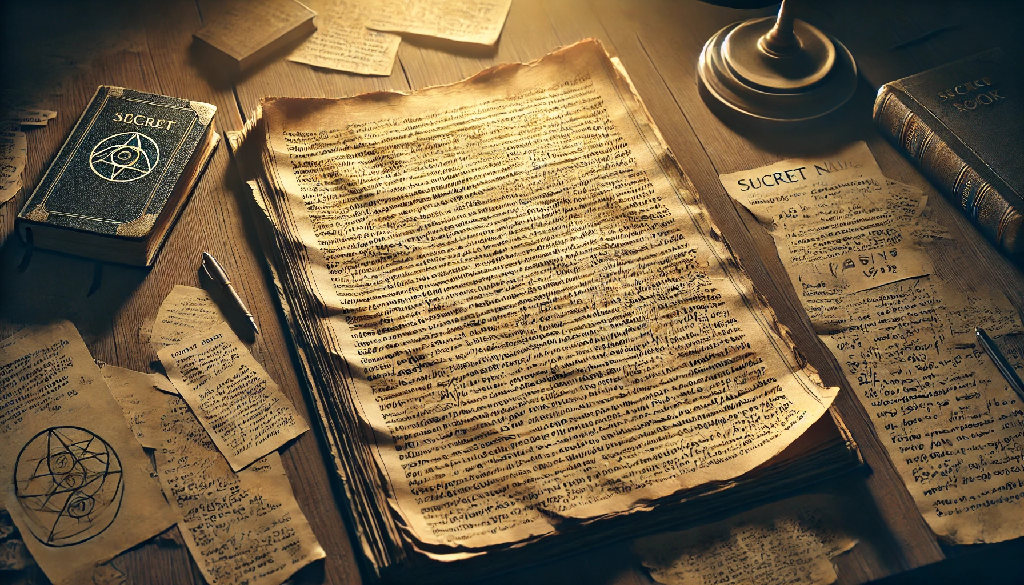

You inherited a fortune from your grandparents, but the bank account it is in is protected by a secret password. Your grandmother told you when you were little that the ***password is made up of the first letters of a sentence*** from a torn book. After a little searching, you find the book, but you can't remember what the sentence was. You find a piece of paper that says: Password: ***NASA examines space broomsticks***. You try it, but the machine returns you with an incorrect password. You try again, hoping you just mistyped it, but again without success. You only have one more try before you can say goodbye to your fabulous fortune forever. After a long moment of thinking, it occurs to you that your grandmother was a Hungarian teacher, perhaps the key lies in some grammatical reference...

1) Filter out the parts of the attached Harry Potter excerpt that are grammatically identical to the sentence ***NASA examines space broomsticks***! To do this, use the sentence structure representation script given below.

2) Since there are several sentences with this structure in the text, look for the one in which the subject entity is '*ORG*', i.e. organization, to find the sentence you are looking for.

To solve this task, use the DependencyMatcher class of the SpaCy library: https://spacy.io/api/dependencymatcher

*My note*: the SpaCy module can analyze English language texts!

## Downloading and installing `SpaCy - en_core_web_sm` model

*My note 1*:

The SpaCy en_core_web_sm model is a small, fast and easy-to-use English language processing model that includes part-of-speech tagging, dependency analysis and noun phrase recognition (NER), but does not include pre-trained word feature vectors.

This model is ideal for applications where performance is more important than deeper semantic analysis, such as basic text analysis tasks or rapid prototyping.

*My note 2*: using the module may require a notebook restart (as the installer says in English at the end of the installation). You need to restart it if the next cell after installation does not run or runs with an error!

In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Use the `displacy` library to visualize sentence structure. If the style parameter is set to 'dep', the grammatical relationship of the words can be displayed (https://spacy.io/usage/visualizers/#dep), if 'ent', individual entities of the text can be displayed (https://spacy.io/usage/visualizers/#ent)

## Visual representation of sentence structure

In [7]:
import spacy
from spacy import displacy

In [8]:
nlp_test = spacy.load("en_core_web_sm")
doc_sample = nlp_test("NASA examines space broomsticks")
displacy.render(doc_sample, style='dep', jupyter=True)

Interpretation of the displayed image: The arrows indicate the subordination relationship, while the text on the arrows indicates the type of relationship (Dependencies). For example, in this case, "NASA" is the subject of the verb "examines". Below the words is their *Part Of Sentence*. To solve the task, only these dependencies and parts of speech are needed, but you can find more information and examples in the pdf below: https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf

The above figure shows the grammatical relationship of each word in the sentence. English explanation of each key based on the article (pdf) given above:

**Parts of speech:**
* ***PROPN***: property name
* ***VERB***: verb
* ***NOUN***: noun

**Relationships:**
* ***nsubj***: A nominal subject is a noun phrase which is the syntactic subject of a clause.
* ***dobj***: direct object The direct object of a Verb Phrase is the noun phrase which is the (accusative) object of the verb.
* ***compound***: A compound word is two or more words linked together to produce a word.


*My note*: What does the 'ent' show:

In [9]:
displacy.render(doc_sample, style='ent', jupyter=True)

*Interpretation*: The meaning of `NASA ORG` is that the NLP has recognized the word as an organization (ORGanization). You need to find a sentence with exactly this *ORG* type subject in the encrypted text!

Download the text file to be analyzed (containing the encrypted part 😀) (takes a few seconds):

In [4]:
! gdown 1iHEOpo__jDk_AI07mByzZ4te7fRCwAJt

Downloading...
From: https://drive.google.com/uc?id=1iHEOpo__jDk_AI07mByzZ4te7fRCwAJt
To: /content/hp_oitm.txt
100% 441k/441k [00:00<00:00, 41.5MB/s]


## Importing libraries

`SpaCy DependencyMatcher` is a flexible tool that allows you to search for patterns based on the dependency structures defined in sentences, for example to identify *subject-predicate relationships* or complex structures.

Specify patterns, thus we can specify unique conditions on the properties of words (e.g. part of speech, lemma, dependency tag) as well as on the relationships between words.

The tool is particularly useful in language processing tasks, such as semantic analysis, information extraction or automating rule-based text analysis.

In [2]:
from spacy.matcher import DependencyMatcher

Loading file, initializing pipeline, and DependencyMatcher dictionary, processing text (~20 seconds).

In [10]:
with open("hp_oitm.txt", "r") as f:
    text = f.read().replace("\n\n", " ").replace("\n", " ")

nlp = spacy.load("en_core_web_sm")

matcher = DependencyMatcher(nlp.vocab)

doc = nlp(text)

A quick digression on checking the type of `doc` variable:

In [7]:
type(doc)

spacy.tokens.doc.Doc

*My note*: Creating a pattern for searching.

The relationship between words (tokens) must be defined based on the above represented graphical structure.

* nsubj (already defined)
* dobj
* compound

The operators (>,<, ...) can be found in the ***Operators*** section of https://spacy.io/api/dependencymatcher !

In [11]:
pattern = [
    {
        "RIGHT_ID": "anchor_verb",
        "RIGHT_ATTRS": {"POS" : "VERB"}
    },
    {
        "LEFT_ID": "anchor_verb",
        "REL_OP": ">",
        "RIGHT_ID": "subject",
        "RIGHT_ATTRS": {"DEP": "nsubj"}
    }, #TODO create pattern (https://spacy.io/api/dependencymatcher)
    {
        "LEFT_ID": "anchor_verb",
        "REL_OP": ">",
        "RIGHT_ID": "object",
        "RIGHT_ATTRS": {"DEP": "dobj"}
    },
    {
        "LEFT_ID": "object",
        "REL_OP": ">",
        "RIGHT_ID": "preposition",
        "RIGHT_ATTRS": {"DEP": "compound"}
    }
]

*My note*: Matching, i.e. finding a match.

1. You have to add the created pattern (`pattern`), then
2. you have to search for matches based on the pattern.


In [12]:
matcher.add("dep", [pattern])
matches = matcher(doc)

In [13]:
print('Number of matches: ', len(matches))

Number of matches:  235


*Additional part*: Print out the parts of the sentence that match the search.

*Note*: to see what the results are, we will print them all out, and then in the next round we'll look for the result with the 'ORG' type subject, which is the first step in deciphering.

In [55]:
counter = 0
counter_matched = 0
for match_id, token_ids in matches:
    counter += 1
    if (
        #FISR STEP Examine all matching (found) sentence fragments
        #(https://spacy.io/api/token/#attributes)
        max(token_ids) - min(token_ids) + 1 == len(token_ids)
        and len(token_ids) >= 2
    ):
        counter_matched += 1
        span_start = min(token_ids)  # First matched token index
        span_end = max(token_ids) + 1  # Last matched token index + 1 for slicing

        # Create a Span object covering the matched part of the text
        matched_span = doc[span_start:span_end]

        print(str(counter), " : ", str(counter_matched), " Matched Span:", matched_span.text)

3  :  1  Matched Span: that said Privet Drive
4  :  2  Matched Span: it struck Mr. Dursley
9  :  3  Matched Span: that made passersby stare
10  :  4  Matched Span: man hugged Mr. Dursley
14  :  5  Matched Span: Harry grabbed broom handle
34  :  6  Matched Span: she crossed Privet Drive
35  :  7  Matched Span: boys wore maroon tailcoats
36  :  8  Matched Span: he asked Aunt Petunia
40  :  9  Matched Span: He handed Uncle Vernon
41  :  10  Matched Span: he informed Aunt Petunia
42  :  11  Matched Span: I WANT MY LETTER
47  :  12  Matched Span: Dumbledore opened office door
50  :  13  Matched Span: Dudley asked Aunt Petunia
52  :  14  Matched Span: yeh read yer letter
64  :  15  Matched Span: you heard Uncle Vernon
65  :  16  Matched Span: McGonagall lifted tea cup
73  :  17  Matched Span: They passed book shops
74  :  18  Matched Span: that sold spell books
95  :  19  Matched Span: he liked Mr. Ollivander
101  :  20  Matched Span: Luna found silver locket
105  :  21  Matched Span: he tol

55 matches out of a possible 235. They are quite diverse. As you can see, many of them contain names of persons (proper nouns, i.e. `PROPN`), but we can only accept `ORG` type! (I think everyone could guess the origin of the text)

In [14]:
for match_id, token_ids in matches:

    if (
        max(token_ids) - min(token_ids) + 1 == len(token_ids)
        #TODO Print out the parts of sentences whose subject is the entity "ORG"
        #(https://spacy.io/api/token/#attributes)
        and len(token_ids) >= 2
        and doc[token_ids[1]].ent_type_ == "ORG"
    ):

        span_start = min(token_ids)  # First matched token index
        span_end = max(token_ids) + 1  # Last matched token index + 1 for slicing

        # Create a Span object covering the matched part of the text
        matched_span = doc[span_start:span_end]

        print(token_ids)
        print(f'span start, span end: {span_start}, {span_end}')
        print("Matched Span:", matched_span.text)


[74905, 74904, 74907, 74906]
span start, span end: 74904, 74908
Matched Span: OAT inflicts troll mayhem


You can check the structure ("dep") and entities ("ent") of the filtered sentences by running the following cell:

In [15]:
from spacy import displacy

nlp_dis = spacy.load("en_core_web_sm")

#Check if there were matches to display
if(span_start is not None and span_end is not None):
    # Visualize the dependency tree
    displacy.render(doc[span_start:span_end].as_doc(), style="dep", jupyter=True)

Based on the figure, the structure of the found sentence matches the given secret key (*NASA examines space broomsticks*)!


The code consists of the first letters of the words:

In [17]:
''.join([i[0] for i in matched_span.text.split(' ')])

'Oitm'



---


own addition
## Checks
Let's look at the (grammatical) similarity of the two texts, at least as the model would define the `similarity` value.

In [19]:
deps1 = [token.dep_ for token in doc_sample]
deps2 = [token.dep_ for token in doc]

# Compare part-of-speech tags
pos1 = [token.pos_ for token in doc_sample]
pos2 = [token.pos_ for token in doc]

# Display results
print(f"Syntactic dependencies (sentence 1): {deps1}")
print(f"Syntactic dependencies (sentence 2): {deps2}")
print(f"Part-of-speech tags (sentence 1): {pos1}")
print(f"Part-of-speech tags (sentence 2): {pos2}")

# Check if they are similar
print(f"Dependencies match: {deps1 == deps2}")
print(f"POS tags match: {pos1 == pos2}")

Syntactic dependencies (sentence 1): ['nsubj', 'ROOT', 'compound', 'dobj']
Syntactic dependencies (sentence 2): ['nmod', 'nummod', 'det', 'ROOT', 'nsubj', 'punct', 'nsubj', 'cc', 'compound', 'conj', 'punct', 'prep', 'pobj', 'nummod', 'punct', 'compound', 'appos', 'punct', 'ROOT', 'acomp', 'aux', 'xcomp', 'mark', 'nsubj', 'ccomp', 'advmod', 'acomp', 'punct', 'conj', 'dobj', 'advmod', 'advmod', 'punct', 'nsubj', 'ROOT', 'det', 'amod', 'attr', 'nsubj', 'aux', 'relcl', 'aux', 'auxpass', 'xcomp', 'prep', 'pobj', 'amod', 'cc', 'conj', 'punct', 'mark', 'nsubj', 'advmod', 'aux', 'neg', 'advcl', 'prep', 'amod', 'pobj', 'punct', 'compound', 'nsubj', 'ROOT', 'det', 'attr', 'prep', 'det', 'pobj', 'acl', 'oprd', 'punct', 'nsubj', 'relcl', 'dobj', 'punct', 'nsubj', 'ROOT', 'det', 'amod', 'punct', 'amod', 'attr', 'prep', 'advmod', 'nummod', 'pobj', 'punct', 'mark', 'nsubj', 'aux', 'advcl', 'det', 'advmod', 'amod', 'dobj', 'punct', 'compound', 'nsubj', 'ROOT', 'acomp', 'cc', 'conj', 'cc', 'conj', 'adv

Well, this part isn't really useful for comparison.

Let's use SpaCy's similarity function:

In [18]:
# Option 1: Compare similarity using SpaCy's similarity method
similarity = doc_sample.similarity(doc)


<ipython-input-18-6c1023990566>:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc_sample.similarity(doc)


Error.
* The `en_core_web_sm` model does not include word vectors; it only provides features based on the tagger, parser, and named *entity recognizer (NER)*. To calculate similarity based on word vectors, use a larger model, such as:

* `en_core_web_md`: Medium-sized English model with pre-trained word vectors.
en_core_web_trf: Transformer-based model with word vectors (larger and more accurate but slower).

Let's download and install the medium sized model!

In [20]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


For the sake of comparison, let's create tools (nlp_test_md, matcher_md) and variables based on the new model.

In [43]:
nlp_test_md = spacy.load("en_core_web_md")
matcher_md = DependencyMatcher(nlp_test_md.vocab)
doc_md = nlp_test_md(text) # run time some 10s of secs

In [39]:
len(doc_md)

99724

Let's depict the relationship between words, again.

In [24]:
doc_sample_md = nlp_test_md("NASA examines space broomsticks")
displacy.render(doc_sample_md, style='dep', jupyter=True)

The basis of the comparison is the vector comparison of the information obtained from examining the sentence "**OAT inflicts troll mayhem**" (*doc_found_md*) and the result of the sample sentence "**NASA examines space broomsticks**" (*doc_sample_md*) with the similarity function:

In [27]:
doc_found_md = nlp_test_md("OAT inflicts troll mayhem") # mathced_span
# Option 1: Compare similarity using SpaCy's similarity method
similarity = doc_sample_md.similarity(doc_found_md)
print(f"Similarity (SpaCy): {similarity}")

Similarity (SpaCy): 0.18895462007036165


Here you find what the similarity function actually calculates:

In [29]:
# Option 2: Compare using vector similarity (cosine similarity)
from scipy.spatial.distance import cosine

vector1 = doc_sample_md.vector
vector2 = doc_found_md.vector

# Compute cosine similarity
cos_sim = 1 - cosine(vector1, vector2)

# Display results
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.18895462477070257


We can get a value in the range -1 (*not at all*) - 1 (*perfectly match*), however the value obtained is not very large, but at least a positive value, meaning there is some similarity.

In [44]:
matcher_md.add("dep", [pattern])
matches_md = matcher_md(doc_md) # original text (doc)
print('Number of matches: ', len(matches_md))

Találatok száma:  237


To see the similarity values for all cases, let's list them all and at the end, print the most similar sentence.

In [45]:

similarity_max = 0
matching_id = -1
final_matched_span = []
for match_id, token_ids in matches_md:

    if (
        # Examine all matching (found) sentence fragments
        #(https://spacy.io/api/token/#attributes)
        max(token_ids) - min(token_ids) + 1 == len(token_ids)
        and len(token_ids) >= 2
    ):

        span_start = min(token_ids)  # First matched token index
        span_end = max(token_ids) + 1  # Last matched token index + 1 for slicing

        # Create a Span object covering the matched part of the text
        matched_span = doc_md[span_start:span_end]
        # Similarity test in all cases
        similarity_curr = doc_sample_md.similarity(nlp_test_md(matched_span.text))
        print(similarity_curr) # print out all similarity values ​​for understanding
        # Searching for the most similar:
        if similarity_curr > similarity_max:
            similarity_max = similarity_curr
            matching_id = match_id
            final_matched_span = matched_span

# Printing the best value case
print(str(matching_id), ' Grammatically most similar result: "', final_matched_span.text, '", similarity: ', similarity_max)

0.21729419844139228
0.045865346992138824
0.2882641959793072
0.07783428763308713
-0.009272087948804157
0.018414068314514823
-1.494354362570986e-05
0.2737807622992324
0.31428843178326116
-0.11507745828137697
0.11987392202240149
0.09662702311732187
0.09899298991216235
0.32172135469264485
0.32625084647493735
0.08776552822656279
0.36743774513020455
0.24159906847642898
0.3165811760136871
0.22663847814734991
0.25975026547097774
0.06028030520714488
0.42824182127066046
0.25267492344889975
0.46077169040536625
0.04294716568659612
0.1557246348244791
0.38207162469824607
0.2537644444639317
0.38399551861252507
0.2646111540496089
0.28456078744076646
0.3330154251109323
0.32899047098501966
0.2626761202844774
0.32208333993273347
0.12930760942806804
0.10409812768310366
0.26964815815780707
0.21157853662021975
0.19214090988621033
0.40387042990242966
0.18895462007036165
-0.03499627089405499
0.11907194399413121
0.17162827647634993
0.05872524889286254
0.054923215426545005
0.16236135977649244
0.433488497775039


`Grammatically most similar result: " Remus delivered morning paper ", similarity value: 0.46077169040536625`

However, this is not the solution, because here the subject is a proper noun (`PROPN`), but not of type `ORG` (organization)!

In [58]:
displacy.render(final_matched_span, style='ent', jupyter=True)

**Remus**: `GPE`, which is "Countries, cities, states." :( In any case, it is not ORG (Companies, agencies, institutions, etc.). The classification is not accurate, but the most importan is that it is not an organization, so this is not (part of) the requested solution!